#  Clasificacion de imagenes con MNIST
---
**Autor:** Escalante Guadarrama Jorge Eduardo

**Importar librerias**

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

**Cargar, normalizar y codificar datos en caliente**

In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values (from 0–255 to 0–1)
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoded vectors
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Construir el modelo de red neuronal**

In [3]:
# Build a sequential model with fully connected layers
model = Sequential([
    Flatten(input_shape=(28, 28)),        # Flatten 28x28 images to a vector of 784
    Dense(128, activation='relu'),        # First hidden layer with 128 neurons
    Dense(64, activation='relu'),         # Second hidden layer with 64 neurons
    Dense(10, activation='softmax')       # Output layer with 10 neurons (one per digit)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Compilar el modelo**

In [4]:
# Compile the model with optimizer, loss function, and evaluation metric
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

**Entrenar el modelo**

In [5]:
# Train the model using training data
history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8682 - loss: 0.4560 - val_accuracy: 0.9554 - val_loss: 0.1487
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9636 - loss: 0.1209 - val_accuracy: 0.9660 - val_loss: 0.1124
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9776 - loss: 0.0732 - val_accuracy: 0.9686 - val_loss: 0.1054
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9823 - loss: 0.0546 - val_accuracy: 0.9700 - val_loss: 0.1023
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9859 - loss: 0.0431 - val_accuracy: 0.9725 - val_loss: 0.0960
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9905 - loss: 0.0302 - val_accuracy: 0.9734 - val_loss: 0.1032
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9907 - loss: 0.0271 - val_accuracy: 0.9737 - val_loss: 0.1028
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9936 - loss: 0.0202

**Evaluar el modelo**

In [6]:
# Evaluate the trained model on test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9718 - loss: 0.1168
Test accuracy: 0.9753


**Precisión de la gráfica a lo largo de las épocas**

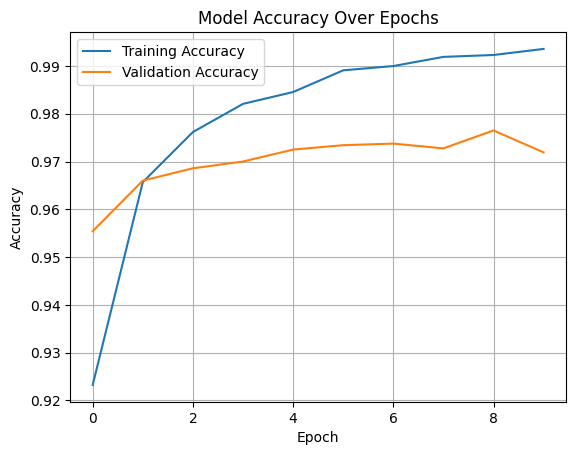

In [7]:
# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()